In [2]:
from sklearn.datasets import load_digits
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [3]:
digits=load_digits()
print('image',digits.data.shape)
print('target',digits.target.shape)

image (1797, 64)
target (1797,)


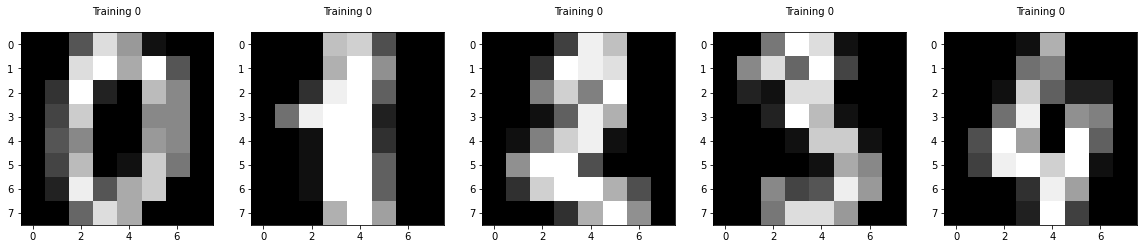

In [20]:
plt.figure(figsize=(20,4))
for index,(image,label) in enumerate(zip(digits.data[0:5],digits.data[0:5])):
    plt.subplot(1,5,index+1)
    plt.imshow(np.reshape(image,(8,8)),cmap=plt.cm.gray)
    label=label[0]
    plt.title('Training %i\n' %label,fontsize=10)

In [23]:
x_test, x_train, y_test, y_train=train_test_split(digits.data,digits.target,random_state=2,test_size=0.23)

In [24]:
LR=LogisticRegression()
LR.fit(x_train,y_train)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
print(LR.predict(x_test[0].reshape(1,64)))

[5]


In [43]:
prediction=LR.predict(x_test)
print(prediction)

[5 6 1 ... 1 1 5]


In [47]:
score=LR.score(x_test,y_test)

In [40]:
import seaborn as sns
from sklearn import metrics

In [44]:
confusion=metrics.confusion_matrix(y_test,prediction)
print(confusion)

[[139   0   0   0   0   1   0   0   0   0]
 [  0 129   0   0   2   0   2   0   1   0]
 [  0   6 128   0   0   0   0   0   0   0]
 [  0   0   3 129   0   2   0   0   5   2]
 [  0   0   0   0 143   0   0   0   0   0]
 [  0   0   1   0   1 129   1   1   0   3]
 [  0   0   0   0   1   0 137   0   2   0]
 [  0   0   0   0   1   0   0 131   0   1]
 [  0   3   1   1   1   3   2   1 122   2]
 [  0   1   0   0   1   1   0   0   4 139]]


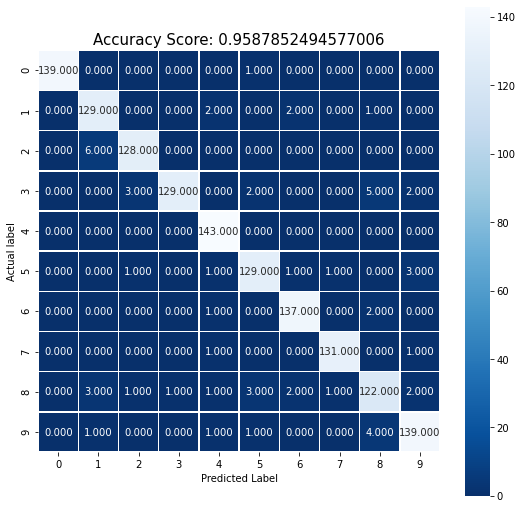

In [49]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion,annot=True,fmt='.3f',linewidths=.5,square=True,cmap='Blues_r');
plt.xlabel('Predicted Label');
plt.ylabel('Actual label');
All_sample='Accuracy Score: {0}'.format(score)
plt.title(All_sample,size=15);
